In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load candidate edges scores.

In [2]:
candEdgesScores = pd.read_csv("edgesScoresRandom.txt", sep= '\t', usecols= [0,1,2,7,8],
                              names= ['source', 'target', 'node2vecScore', 'gainScore', 'expGainScore'], header = 0)
#candEdgesScores.head()

In [3]:
candEdgesDist = pd.read_csv("edgesDistancesRandomSources.txt", sep= "\t")
#candEdgesDist.head()

In [4]:
candEdgesScores = candEdgesScores.join(candEdgesDist.set_index(['source', 'target']), on= ['source', 'target'])
#candEdgesScores.head()

### Describe candidate edges.

In [115]:
#candEdgesScores.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [85]:
#candEdgesScores.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])['distance']

### Load nodes' quality characteristics.

In [5]:
nodes = pd.read_csv('nodeQualityFeatures.txt', sep= '\t')
#nodes.head()

### Describe nodes.

In [109]:
#nodes.describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

### Load selected targets for node2vec, maxGain, maxExpGain.

In [6]:
policies = ['Node2vec', "Gain", 'ExpGain', 'Random']
selectedEdges = dict()
for policy in policies:
    # Read selected edges scores, distances and join tables.
    eScores = pd.read_csv("edgesSelectedBy%sRandomSources.txt" %policy, sep= '\t', usecols= [0,1,2,7,8],
                          names= ['source', 'target', 'node2vecScore', 'gainScore', 'expGainScore'], header = 0 )
    eDist = pd.read_csv("selectedEdgesBy%sRandomSourcesDistances.txt" %policy, sep= '\t')
    selectedEdges[policy] = eScores.join(eDist.set_index(['source', 'target']), on= ['source', 'target'])

### Drop outliers.

#### For node2vec

<IPython.core.display.Javascript object>


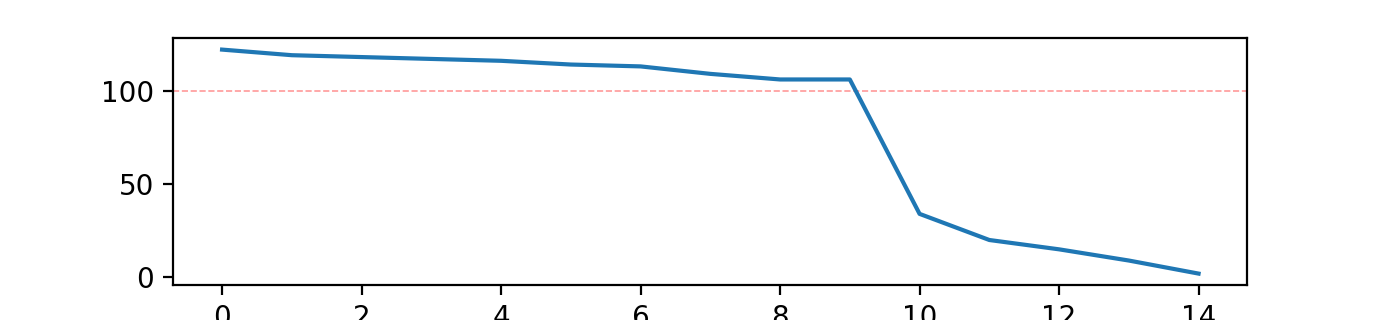

In [7]:
temp = selectedEdges['Node2vec']['target'].value_counts()
temp1 = temp.to_numpy()
plt.axhline(y= 100, color= 'r', linestyle= '--', alpha= 0.4, linewidth= 0.6)
plt.plot(np.arange(temp1.size),temp1)

In [8]:
selectedEdges['Node2vec'] = selectedEdges['Node2vec'][selectedEdges['Node2vec']['target'].isin(temp[temp > 100].index[:] ) ]

#### For maximum gain.

<IPython.core.display.Javascript object>


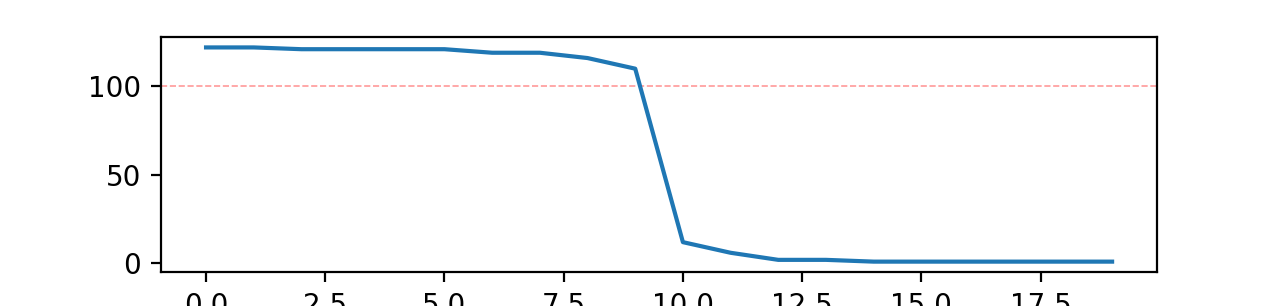

In [9]:
temp = selectedEdges['Gain']['target'].value_counts()
temp1 = temp.to_numpy()
plt.axhline(y= 100, color= 'r', linestyle= '--', alpha= 0.4, linewidth= 0.6)
plt.plot(np.arange(temp1.size),temp1)

In [10]:
selectedEdges['Gain'] = selectedEdges['Gain'][selectedEdges['Gain']['target'].isin(temp[temp > 100].index[:] ) ]

#### For maximum expected gain.

<IPython.core.display.Javascript object>


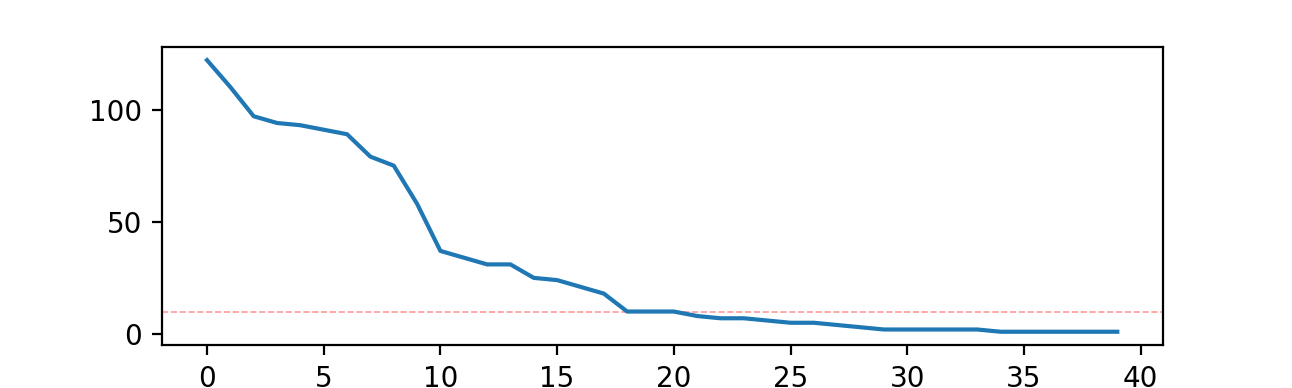

In [11]:
temp = selectedEdges['ExpGain']['target'].value_counts()
temp1 = temp.to_numpy()
plt.axhline(y= 10, color= 'r', linestyle= '--', alpha= 0.4, linewidth= 0.6)
plt.plot(np.arange(temp1.size),temp1)

In [12]:
selectedEdges['ExpGain'] = selectedEdges['ExpGain'][selectedEdges['ExpGain']['target'].isin(temp[temp > 10].index[:] ) ]

### Describe selected edges.

#### Node2vec.

In [96]:
#selectedEdges['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Gain.

In [97]:
#selectedEdges['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Expected gain.

In [98]:
#selectedEdges['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Random.

In [99]:
#selectedEdges['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

### Describe target nodes.

In [13]:
targetNodes = dict()
for policy in policies:
    targetNodes[policy] = nodes[nodes['nodeId'].isin(selectedEdges[policy]['target']) ]

#### Node2vec.

In [101]:
#targetNodes['Node2vec'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Gain.

In [102]:
#targetNodes['Gain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

#### Expected Gain.

In [103]:
#targetNodes['ExpGain'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

In [104]:
#targetNodes['Random'].describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

### Results.

In [28]:
print("----------------Distances---------------:")
edgeDistances = {'candidate': candEdgesScores.describe(percentiles= [])['distance'].append(pd.Series(candEdgesScores.median()['distance'], index= ['median']) ),
      'Random': selectedEdges['Random'].describe(percentiles= [])['distance'].append(pd.Series(selectedEdges['Random'].median()['distance'], index= ['median']) ),
      'Node2vec': selectedEdges['Node2vec'].describe(percentiles= [])['distance'].append(pd.Series(selectedEdges['Node2vec'].median()['distance'], index= ['median']) ),
      'Gain': selectedEdges['Gain'].describe(percentiles= [])['distance'].append(pd.Series(selectedEdges['Gain'].median()['distance'], index= ['median']) ),
      'ExpGain': selectedEdges['ExpGain'].describe(percentiles= [])['distance'].append(pd.Series(selectedEdges['ExpGain'].median()['distance'], index= ['median']) )
      }
edgeDistances = pd.DataFrame(edgeDistances)
edgeDistances

----------------Distances---------------:


,candidate,Random,Node2vec,Gain,ExpGain
count,147495.000000,1220.000000,1140.000000,1192.000000,1129.000000
mean,2.817350,2.809016,2.313158,3.745805,2.644818
std,0.761287,0.814401,0.620970,0.940719,0.726019
min,1.000000,1.000000,1.000000,2.000000,1.000000
50%,3.000000,3.000000,2.000000,4.000000,3.000000
max,7.000000,7.000000,4.000000,7.000000,5.000000
median,3.000000,3.000000,2.000000,4.000000,3.000000


In [30]:
print("----------------Pagerank---------------:")

targetPagerank = {
    'Candidate': nodes.describe(percentiles= [])['pagerank'].append(pd.Series(nodes.median()['pagerank'], index=['median'] ) ),
    'Random': targetNodes['Random'].describe(percentiles= [])['pagerank'].append(pd.Series(targetNodes['Random'].median()['pagerank'], index=['median'] ) ),
    'Node2vec': targetNodes['Node2vec'].describe(percentiles= [])['pagerank'].append(pd.Series(targetNodes['Node2vec'].median()['pagerank'], index=['median'] ) ),
    'Gain': targetNodes['Gain'].describe(percentiles= [])['pagerank'].append(pd.Series(targetNodes['Gain'].median()['pagerank'], index=['median'] ) ),
    'ExpGain': targetNodes['ExpGain'].describe(percentiles= [])['pagerank'].append(pd.Series(targetNodes['ExpGain'].median()['pagerank'], index=['median'] ) )
}
targetPagerank = pd.DataFrame(targetPagerank)
targetPagerank

----------------Pagerank---------------:


,Candidate,Random,Node2vec,Gain,ExpGain
count,1222.000000,765.000000,10.000000,10.000000,18.000000
mean,0.000818,0.000791,0.004645,0.000284,0.001404
std,0.002225,0.002062,0.002701,0.000106,0.001404
min,0.000243,0.000243,0.000243,0.000243,0.000243
50%,0.000331,0.000331,0.004722,0.000243,0.001271
max,0.045172,0.045172,0.010006,0.000583,0.006028
median,0.000331,0.000331,0.004722,0.000243,0.001271


In [33]:
print("----------------Red Pagerank---------------:")

targetRedPagerank = {
    'Candidate': nodes.describe(percentiles= [])['redPagerank'].append(pd.Series(nodes.median()['redPagerank'], index=['median'] ) ),
    'Random': targetNodes['Random'].describe(percentiles= [])['redPagerank'].append(pd.Series(targetNodes['Random'].median()['redPagerank'], index=['median'] ) ),
    'Node2vec': targetNodes['Node2vec'].describe(percentiles= [])['redPagerank'].append(pd.Series(targetNodes['Node2vec'].median()['redPagerank'], index=['median'] ) ),
    'Gain': targetNodes['Gain'].describe(percentiles= [])['redPagerank'].append(pd.Series(targetNodes['Gain'].median()['redPagerank'], index=['median'] ) ),
    'ExpGain': targetNodes['ExpGain'].describe(percentiles= [])['redPagerank'].append(pd.Series(targetNodes['ExpGain'].median()['redPagerank'], index=['median'] ) )
}
targetRedPagerank = pd.DataFrame(targetRedPagerank)
targetRedPagerank

----------------Red Pagerank---------------:


,Candidate,Random,Node2vec,Gain,ExpGain
count,1222.000000,765.000000,10.000000,10.000000,18.000000
mean,0.332798,0.328954,0.323023,0.622608,0.561188
std,0.164824,0.164405,0.140480,0.006460,0.047647
min,0.000000,0.000000,0.161032,0.615104,0.490224
50%,0.282878,0.282878,0.313908,0.620985,0.555863
max,0.638946,0.638946,0.564971,0.638946,0.638946
median,0.282878,0.282878,0.313908,0.620985,0.555863


In [34]:
print("----------------Red Neighbors Out Ratio---------------:")

targetRedOutRatio = {
    'Candidate': nodes.describe(percentiles= [])['redNeighborsOutRatio'].append(pd.Series(nodes.median()['redNeighborsOutRatio'], index= ['median']) ),
    'Random': targetNodes['Random'].describe(percentiles= [])['redNeighborsOutRatio'].append(pd.Series(targetNodes['Random'].median()['redNeighborsOutRatio'], index= ['median']) ),
    'Node2vec': targetNodes['Node2vec'].describe(percentiles= [])['redNeighborsOutRatio'].append(pd.Series(targetNodes['Node2vec'].median()['redNeighborsOutRatio'], index= ['median']) ),
    'Gain': targetNodes['Gain'].describe(percentiles= [])['redNeighborsOutRatio'].append(pd.Series(targetNodes['Gain'].median()['redNeighborsOutRatio'], index= ['median']) ),
    'ExpGain': targetNodes['ExpGain'].describe(percentiles= [])['redNeighborsOutRatio'].append(pd.Series(targetNodes['ExpGain'].median()['redNeighborsOutRatio'], index= ['median']) )
}
targetRedOutRatio = pd.DataFrame(targetRedOutRatio)
targetRedOutRatio

----------------Red Neighbors Out Ratio---------------:


,Candidate,Random,Node2vec,Gain,ExpGain
count,1222.000000,765.000000,10.000000,10.0,18.000000
mean,0.432953,0.427127,0.277833,1.0,0.952916
std,0.419469,0.418462,0.378486,0.0,0.057653
min,0.000000,0.000000,0.000000,1.0,0.834951
50%,0.500000,0.500000,0.099480,1.0,0.970612
max,1.000000,1.000000,0.957143,1.0,1.000000
median,0.500000,0.500000,0.099480,1.0,0.970612


### Unique targets by policy.

In [35]:
policiesB = ['Node2vec', 'ResourceAllocation', 'PreferencialAttachment', 'JaccardCoefficient', 'Gain', 'ExpGain', 
           'AdamicAdar', 'Random']
selEdgesB = dict()
uniqueNodes = dict()
for policy in policiesB:
    selEdgesB[policy] = pd.read_csv("selectedEdgesBy%sRandomSourcesDistances.txt" %policy, sep= '\t')
    uniqueNodes[policy] = selEdgesB[policy]['target'].nunique()
uniqueNodes

{'Node2vec': 15,
 'ResourceAllocation': 351,
 'PreferencialAttachment': 17,
 'JaccardCoefficient': 662,
 'Gain': 20,
 'ExpGain': 40,
 'AdamicAdar': 315,
 'Random': 765}